In [335]:
#Import pandas, matplotlib.pyplot, and seaborn 
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## Load Accounts data from 'AllAccountReads.xlsx' file

In [337]:
#Load Accounts data for year 2017-2018
df1 = pd.read_excel('AllAccountReads.xlsx', sheet_name= 'Usage_17_18')
#Load Accounts data for year 2018-2019
df2 = pd.read_excel('AllAccountReads.xlsx', sheet_name= 'Usage_18_19')
#Load Accounts data for year 2019-2020
df3 = pd.read_excel('AllAccountReads.xlsx', sheet_name= 'Usage_19_20')

In [338]:
print('df1')
print(df1.head(3).T)
print('df2')
print(df2.head(3).T)
print('df3')
print(df3.head(3).T)

df1
                                   0                    1                    2
LOC ID                    1000000000           1000000001           1000000002
WTR_RATE                      W-RSFD               W-RSFD               W-RSFD
WTR_DWEL_UNIT                      1                    1                    1
WTR_USE1                          22                    9                   10
WTR_USE2                          22                    8                    7
WTR_USE3                          15                    7                    7
WTR_USE4                           9                    5                    8
WTR_USE5                          10                    4                    7
WTR_USE6                          10                    7                    8
WTR_USE7                          11                    5                   12
WTR_USE8                           9                    6                   10
WTR_USE9                          11            

Over the three years, each period of every LOC ID is recognized with the number of days(WTR_READ_DAYS), read date(WTR_READ_DT) and amount of water usage(WTR_USE).

The order of read dates is from read date12 to read date11. Consequently the order of water usage read days and water usage columns are from 12 to 1.
For example, for the fist and second users with location Id of 1000000000 and 1000000001: Read date12(WTR_READ_DT12) was in Augest then read date11(WTR_READ_DT11) was on September and so on. 

In [339]:
#Check the index column.
print('df1 Index:',df1.index)
print('df2 Index:',df2.index)
print('df3 Index:',df3.index)

df1 Index: RangeIndex(start=0, stop=78894, step=1)
df2 Index: RangeIndex(start=0, stop=78894, step=1)
df3 Index: RangeIndex(start=0, stop=78894, step=1)


In [340]:
#Strip the 'WTR' form the name of columns. and change the 'LOC ID' to 'LOC_ID'.
col_labels = df1.columns.str.replace('WTR_','')
col_labels = col_labels.str.replace(' ','_')

df1.columns = col_labels
df2.columns = col_labels
df3.columns = col_labels

In [341]:
#Check if there is duplicated values in 'LOC_ID' column.
df1.LOC_ID.value_counts().head()

1000001510    1
1000000204    1
1000030909    1
1000037054    1
1000035007    1
Name: LOC_ID, dtype: int64

In [342]:
#Check if there is duplicated values in 'LOC_ID' column.
df2.LOC_ID.value_counts().head()

1000001510    1
1000000204    1
1000030909    1
1000037054    1
1000035007    1
Name: LOC_ID, dtype: int64

In [343]:
#Check if there is duplicated values in 'LOC_ID' column.
df3.LOC_ID.value_counts().head()

1000001510    1
1000000204    1
1000030909    1
1000037054    1
1000035007    1
Name: LOC_ID, dtype: int64

In [344]:
#Check the LOC_ID colum in all three DataFrame are same.
((df1.LOC_ID != df2.LOC_ID) & (df2.LOC_ID != df3.LOC_ID)).sum()


0

#### Length of three DataFrames are eqaul and LOC_ID colum (with no missing value) is same in all three DataFrames.

In [345]:
df1.set_index('LOC_ID', inplace=True)
df2.set_index('LOC_ID', inplace=True)
df3.set_index('LOC_ID', inplace=True)

In [346]:
#Check the RATE colum in all three DataFrame are same.
print('# LOC_ID or accounts that their RATE have been changed in 2018-2019 in comparison with 2017-2018:', 
      (df1.RATE != df2.RATE).sum())

# LOC_ID or accounts that their RATE have been changed in 2018-2019 in comparison with 2017-2018: 83


In [347]:
#Check the accounts in df1 that their RATE has been changed.
df1[(df1.RATE != df2.RATE)].head()

,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,USE8,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
LOC_ID,,,,,,,,,,,,,,,,,,,,,
1000001561,W-RSFD,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000003524,W-RSFD,1.0,9.0,9.0,12.0,11.0,9.0,9.0,9.0,10.0,...,32.0,29.0,29.0,30.0,32.0,31.0,33.0,29.0,32.0,29.0
1000004763,W-RSFD,1.0,19.0,37.0,10.0,12.0,9.0,19.0,15.0,15.0,...,29.0,29.0,29.0,32.0,31.0,34.0,29.0,29.0,32.0,29.0
1000004820,W-RSFD,1.0,7.0,9.0,7.0,6.0,5.0,7.0,8.0,7.0,...,29.0,29.0,32.0,29.0,34.0,31.0,29.0,31.0,30.0,29.0
1000005525,W-RSFD,1.0,18.0,15.0,20.0,10.0,18.0,21.0,22.0,23.0,...,30.0,29.0,31.0,30.0,30.0,33.0,33.0,29.0,29.0,30.0


In [348]:
#Check the accounts in df2 that their RATE has been changed.
df2[(df1.RATE != df2.RATE)].head()

,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,USE8,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
LOC_ID,,,,,,,,,,,,,,,,,,,,,
1000001561,W-RDUPLX,2.0,28.0,31.0,13.0,13.0,8.0,10.0,20.0,11.0,...,29.0,29.0,31.0,30.0,34.0,13.0,NaN,NaN,NaN,NaN
1000003524,W-RDUPLX,1.0,11.0,10.0,8.0,10.0,7.0,6.0,NaN,NaN,...,30.0,31.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
1000004763,W-RDUPLX,2.0,11.0,9.0,13.0,12.0,9.0,9.0,12.0,NaN,...,32.0,30.0,29.0,29.0,35.0,NaN,NaN,NaN,NaN,NaN
1000004820,W-RDUPLX,2.0,16.0,16.0,27.0,15.0,6.0,7.0,8.0,2.0,...,31.0,29.0,29.0,33.0,32.0,19.0,NaN,NaN,NaN,NaN
1000005525,W-RDUPLX,1.0,10.0,14.0,15.0,11.0,7.0,8.0,9.0,7.0,...,30.0,29.0,29.0,32.0,30.0,34.0,30.0,31.0,NaN,NaN


In [349]:
print('# LOC_ID or accounts that their RATE have been changed in 2019-2020 in comparison with year 2018-2018: ', 
      (df2.RATE != df3.RATE).sum())

# LOC_ID or accounts that their RATE have been changed in 2019-2020 in comparison with year 2018-2018:  165


### Althogh the LOC_ID column has been same over 3 years but the Rate (type of customer) of 83 accounts and 165 accounts has been changed in 2018-2019  and 2019-2020 respectively.

In [350]:
#Call the info method on df1 to see a summary of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78894 entries, 1000000000 to 1000078893
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RATE         78894 non-null  object        
 1   DWEL_UNIT    77632 non-null  float64       
 2   USE1         78489 non-null  float64       
 3   USE2         78053 non-null  float64       
 4   USE3         77627 non-null  float64       
 5   USE4         77228 non-null  float64       
 6   USE5         76853 non-null  float64       
 7   USE6         76535 non-null  float64       
 8   USE7         76200 non-null  float64       
 9   USE8         75845 non-null  float64       
 10  USE9         75476 non-null  float64       
 11  USE10        75112 non-null  float64       
 12  USE11        74762 non-null  float64       
 13  USE12        74363 non-null  float64       
 14  READ_DT1     78488 non-null  datetime64[ns]
 15  READ_DT2     78052 non-null  datetime64

In [351]:
#Count the number of missing values in each column as well as their percentage in df1.
missing1 = pd.concat([df1.isna().sum(), round(100 * df1.isna().mean(), 2)], axis=1)
missing1.columns = ['count','%']
print('Information on missing values on df1')
missing1.sort_values(by= '%', ascending= False)

Information on missing values on df1


,count,%
READ_DAYS12,4532,5.74
READ_DT12,4532,5.74
USE12,4531,5.74
USE11,4132,5.24
READ_DAYS11,4133,5.24
READ_DT11,4133,5.24
READ_DAYS10,3783,4.80
READ_DT10,3783,4.80
USE10,3782,4.79
READ_DAYS9,3419,4.33


In [352]:
#Call the info method on df2 to see a summary of data
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78894 entries, 1000000000 to 1000078893
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RATE         78894 non-null  object        
 1   DWEL_UNIT    77626 non-null  float64       
 2   USE1         78829 non-null  float64       
 3   USE2         78783 non-null  float64       
 4   USE3         78726 non-null  float64       
 5   USE4         78683 non-null  float64       
 6   USE5         78642 non-null  float64       
 7   USE6         78610 non-null  float64       
 8   USE7         78579 non-null  float64       
 9   USE8         78544 non-null  float64       
 10  USE9         78518 non-null  float64       
 11  USE10        78483 non-null  float64       
 12  USE11        78445 non-null  float64       
 13  USE12        78379 non-null  float64       
 14  READ_DT1     78829 non-null  datetime64[ns]
 15  READ_DT2     78784 non-null  datetime64

In [353]:
#Count the number of missing values in each column as well as their percentage in df2.
missing2 = pd.concat([df2.isna().sum(), round(100 * df2.isna().mean(), 2)], axis=1)
missing2.columns = ['count','%']
print('Information on missing values on df2')
missing2.sort_values(by= '%', ascending= False)

Information on missing values on df2


,count,%
DWEL_UNIT,1268,1.61
USE12,515,0.65
READ_DT12,515,0.65
READ_DAYS12,515,0.65
USE11,449,0.57
READ_DAYS11,449,0.57
READ_DT11,449,0.57
USE10,411,0.52
READ_DAYS10,411,0.52
READ_DT10,411,0.52


In [354]:
#Call the info method on df3 to see a summary of data
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78894 entries, 1000000000 to 1000078893
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RATE         78894 non-null  object        
 1   DWEL_UNIT    77617 non-null  float64       
 2   USE1         78842 non-null  float64       
 3   USE2         78815 non-null  float64       
 4   USE3         78779 non-null  float64       
 5   USE4         78739 non-null  float64       
 6   USE5         78681 non-null  float64       
 7   USE6         78642 non-null  float64       
 8   USE7         78591 non-null  float64       
 9   USE8         78551 non-null  float64       
 10  USE9         78510 non-null  float64       
 11  USE10        78468 non-null  float64       
 12  USE11        78423 non-null  float64       
 13  USE12        78381 non-null  float64       
 14  READ_DT1     78842 non-null  datetime64[ns]
 15  READ_DT2     78816 non-null  datetime64

In [355]:
#Count the number of missing values in each column as well as their percentage in df3.
missing3 = pd.concat([df3.isna().sum(), round(100 * df3.isna().mean(), 2)], axis=1)
missing3.columns = ['count','%']
print('Information on missing values on df3')
missing3.sort_values(by= '%', ascending= False)

Information on missing values on df3


,count,%
DWEL_UNIT,1277,1.62
USE12,513,0.65
READ_DT12,513,0.65
READ_DAYS12,513,0.65
USE11,471,0.60
READ_DAYS11,471,0.60
READ_DT11,471,0.60
USE10,426,0.54
READ_DAYS10,426,0.54
READ_DT10,426,0.54


In [356]:
missing_values = pd.concat([df1.isna().sum(), round(100 * df1.isna().mean(), 2),
           df2.isna().sum(), round(100 * df2.isna().mean(), 2),
          df3.isna().sum(), round(100 * df3.isna().mean(), 2)], axis=1)

missing_values.columns = ['count_yr1','%_in_yr1','count_yr2','%_in_yr2','count_yr3','%_in_yr3']
missing_values = missing_values.sort_values(by= '%_in_yr1', ascending= False)
printmd("\n<span style='color:Blue'>**Information on Missing Values over Three Years**\n</span>")
missing_values


<span style='color:Blue'>**Information on Missing Values over Three Years**
</span>

,count_yr1,%_in_yr1,count_yr2,%_in_yr2,count_yr3,%_in_yr3
READ_DAYS12,4532,5.74,515,0.65,513,0.65
READ_DT12,4532,5.74,515,0.65,513,0.65
USE12,4531,5.74,515,0.65,513,0.65
USE11,4132,5.24,449,0.57,471,0.60
READ_DAYS11,4133,5.24,449,0.57,471,0.60
READ_DT11,4133,5.24,449,0.57,471,0.60
READ_DAYS10,3783,4.80,411,0.52,426,0.54
READ_DT10,3783,4.80,411,0.52,426,0.54
USE10,3782,4.79,411,0.52,426,0.54
READ_DAYS9,3419,4.33,376,0.48,384,0.49


#### In all three years, data on the first period of reading accounts (READ_DAYS12, READ_DT12, USE12) has the most missing values. As moving forward the number of missing values for each period has decreased, so that the 12th period data (READ_DAYS1, READ_DT1, USE1) has least missing values.

#### The number of missing values in first year is significantly higher.

In [357]:
def count(customer:str):
    '''this function takes the type of customer and returns the
     number of customer, number and percentage of missing values associated to.''' 
    
    temp = df1[df1.RATE == customer]
    number = temp['DWEL_UNIT'].sum()
    missing_num = temp['DWEL_UNIT'].isna().sum()
    missing_per = round(100* temp['DWEL_UNIT'].isna().sum()/len(df1), 2)
    return(number, missing_num, missing_per )

In [358]:
#Calculate the market share of each Rate(customer type), the number of Rate based on the number of Dwellling unit
#and % of related missing values.
dict1= {rate:count(rate) for rate in df1.RATE.unique()}
customer = pd.DataFrame(dict1)
customer.columns = ['Singel_family', 'Multi_family','Duplex','Commercial','Irrigation','Industrial']
customer = customer.T
customer.columns = ['count', '# missing_value', '% missing_value']

customer

,count,# missing_value,% missing_value
Singel_family,53845.0,2.0,0.00
Multi_family,88064.0,0.0,0.00
Duplex,13461.0,2.0,0.00
Commercial,1578.0,136.0,0.17
Irrigation,0.0,1122.0,1.42
Industrial,0.0,0.0,0.00


#### Number of dwelling units for industrial customers are zero and for irrigation customers are null. If each of these customer types with their unique ID counts as an one customer, the total number of them can be their summation.

In [359]:
customer.iloc[4:6,0] = list(df1.RATE.value_counts()[4:]) 
customer['market_share'] = list(round(100* df1.RATE.value_counts()/len(df1),2))
customer = customer[['market_share', 'count', '# missing_value', '% missing_value']]
printmd("\n<span style='color:Blue'>**Info on RATE(customer types) over the Year 2017-2018**</span>")
customer


<span style='color:Blue'>**Info on RATE(customer types) over the Year 2017-2018**</span>

,market_share,count,# missing_value,% missing_value
Singel_family,68.23,53845.0,2.0,0.00
Multi_family,13.90,88064.0,0.0,0.00
Duplex,9.19,13461.0,2.0,0.00
Commercial,7.00,1578.0,136.0,0.17
Irrigation,1.42,1122.0,1122.0,1.42
Industrial,0.25,197.0,0.0,0.00


In [360]:
#find pure commercial customers.
df1[(df1.RATE == 'W-COM') & (df1.DWEL_UNIT== 0)].shape

(5132, 38)

The value of dwelling unit for more than 5100 pure comercial customers is zero.

#### The majority of customers (more than 91%) are Residential including single family dwelling, multi-family and duplex houses. In addition, some Commercial customers used the water for residual and commercial application under one account.

#### Only 1.42% of customers used water for irrigation and 0.25% of them had industrial usage.

### ??
Replace value of one for dwelling unit of pure commercial customers.

Replace value of one for dwelling unit of irrigation and industrial customers.

## df2

In [361]:
#Calculate the market share of each Rate(customer type), the number of Rate based on the number of Dwellling unit
#and % of related missing values.
dict2 = {rate:count(rate) for rate in df2.RATE.unique()}
customer2 = pd.DataFrame(dict2)
customer2.columns = ['Singel_family', 'Multi_family','Duplex','Commercial','Irrigation','Industrial']
customer2 = customer2.T
customer2.columns = ['count', '# missing_value', '% missing_value']

customer2

,count,# missing_value,% missing_value
Singel_family,53845.0,2.0,0.00
Multi_family,88064.0,0.0,0.00
Duplex,13461.0,2.0,0.00
Commercial,1578.0,136.0,0.17
Irrigation,0.0,1122.0,1.42
Industrial,0.0,0.0,0.00


In [362]:
customer2.iloc[4:6,0] = list(df2.RATE.value_counts()[4:]) 
customer2['market_share'] = list(round(100* df2.RATE.value_counts()/len(df2),2))
customer2 = customer2[['market_share', 'count', '# missing_value', '% missing_value']]
printmd("\n<span style='color:Blue'>**Info on RATE(customer types) over the Year 2018-2019**</span>")
customer2


<span style='color:Blue'>**Info on RATE(customer types) over the Year 2018-2019**</span>

,market_share,count,# missing_value,% missing_value
Singel_family,68.23,53845.0,2.0,0.00
Multi_family,13.90,88064.0,0.0,0.00
Duplex,9.20,13461.0,2.0,0.00
Commercial,7.01,1578.0,136.0,0.17
Irrigation,1.42,1124.0,1122.0,1.42
Industrial,0.25,194.0,0.0,0.00


## df3

In [363]:
#Calculate the market share of each Rate(customer type), the number of Rate based on the number of Dwellling unit
#and % of related missing values.
dict3 = {rate:count(rate) for rate in df3.RATE.unique()}
customer3 = pd.DataFrame(dict3)
customer3.columns = ['Singel_family', 'Multi_family','Duplex','Commercial','Irrigation','Industrial']
customer3 = customer3.T
customer3.columns = ['count', '# missing_value', '% missing_value']

customer3

,count,# missing_value,% missing_value
Singel_family,53845.0,2.0,0.00
Multi_family,88064.0,0.0,0.00
Duplex,13461.0,2.0,0.00
Commercial,1578.0,136.0,0.17
Irrigation,0.0,1122.0,1.42
Industrial,0.0,0.0,0.00


In [364]:
customer3.iloc[4:6,0] = list(df3.RATE.value_counts()[4:]) 
customer3['market_share'] = list(round(100* df3.RATE.value_counts()/len(df3),2))
customer3 = customer3[['market_share', 'count', '# missing_value', '% missing_value']]
printmd("\n<span style='color:Blue'>**Info on RATE(customer types) over the Year 2019-2020**</span>")
customer3


<span style='color:Blue'>**Info on RATE(customer types) over the Year 2019-2020**</span>

,market_share,count,# missing_value,% missing_value
Singel_family,68.11,53845.0,2.0,0.00
Multi_family,13.90,88064.0,0.0,0.00
Duplex,9.31,13461.0,2.0,0.00
Commercial,7.00,1578.0,136.0,0.17
Irrigation,1.43,1125.0,1122.0,1.42
Industrial,0.25,195.0,0.0,0.00


## Checking missing values in df1

In [365]:
#check the two missing values of dwelling unit among single family customers. 
df1[(df1.RATE == 'W-RSFD') & (df1.DWEL_UNIT.isna())].T

LOC_ID,1000017509,1000035946
RATE,W-RSFD,W-RSFD
DWEL_UNIT,NaN,NaN
USE1,NaN,365
USE2,NaN,25
USE3,NaN,26
USE4,NaN,20
USE5,NaN,16
USE6,NaN,20
USE7,NaN,25
USE8,NaN,21


In [366]:
#Check data on LOC_ID of 1000017509 in df2.
df2[df2.index == 1000017509].T

LOC_ID,1000017509
RATE,W-RSFD
DWEL_UNIT,NaN
USE1,NaN
USE2,NaN
USE3,NaN
USE4,NaN
USE5,NaN
USE6,NaN
USE7,NaN
USE8,NaN


In [367]:
#Check data on LOC_ID of 1000017509 in df3.
df3[df3.index == 1000017509].T

LOC_ID,1000017509
RATE,W-RSFD
DWEL_UNIT,NaN
USE1,NaN
USE2,NaN
USE3,NaN
USE4,NaN
USE5,NaN
USE6,NaN
USE7,NaN
USE8,NaN


##### There is no data for customer with LOC_ID of 1000017509 in any DataFrames. So its row is not informative and let's drop from all three df.

In [368]:
df1 = df1[df1.index != 1000017509]

In [369]:
df2 = df2[df2.index != 1000017509]
df3 = df3[df3.index != 1000017509]

In [370]:
#Usage data for the customer with the LOC_ID of 1000035946 were recorded but without any READ Date records.
#let's check the residual accounts before and after the customer with LOC_ID of 1000035946.
df1.iloc[35945:35948,:].T

LOC_ID,1000035946,1000035947,1000035948
RATE,W-RSFD,W-RSFD,W-RMF
DWEL_UNIT,NaN,1,13
USE1,365,14,43
USE2,25,13,43
USE3,26,10,55
USE4,20,11,53
USE5,16,11,48
USE6,20,11,47
USE7,25,13,62
USE8,21,12,60


In [371]:
#It has value in second year.
df2[df2.index == 1000035946].T

LOC_ID,1000035946
RATE,W-RSFD
DWEL_UNIT,NaN
USE1,NaN
USE2,NaN
USE3,0
USE4,1
USE5,2
USE6,0
USE7,0
USE8,0


In [372]:
#It has value in third year.
df3[df3.index == 1000035946].T

LOC_ID,1000035946
RATE,W-RSFD
DWEL_UNIT,NaN
USE1,NaN
USE2,NaN
USE3,0
USE4,0
USE5,0
USE6,2
USE7,1
USE8,6


In [373]:
#Use forward fillna approach, since it is more look like its next accout in terms of usage volume.
df1.iloc[35946,1] = 1
df1.iloc[35946,14:38] = df1.iloc[35947,14:38]

#The value of USE1 seems to be wrong(data entry error) because it is too different from its previous usage.
df1.iloc[35946,2] = round(df1.iloc[35946,3:14].mean())
df1[df1.index == 1000035946].T

LOC_ID,1000035946
RATE,W-RSFD
DWEL_UNIT,NaN
USE1,365
USE2,25
USE3,26
USE4,20
USE5,16
USE6,20
USE7,25
USE8,21


In [374]:
#check the two missing values of dwelling unit among Duplex customers. 
df1[(df1.RATE == 'W-RDUPLX') & (df1.DWEL_UNIT.isna())].T

LOC_ID,1000012743,1000065066
RATE,W-RDUPLX,W-RDUPLX
DWEL_UNIT,NaN,NaN
USE1,NaN,NaN
USE2,NaN,NaN
USE3,NaN,NaN
USE4,NaN,NaN
USE5,NaN,NaN
USE6,NaN,NaN
USE7,NaN,NaN
USE8,NaN,NaN


In [375]:
df2[(df2.RATE == 'W-RDUPLX') & (df2.DWEL_UNIT.isna())].T

LOC_ID,1000012743,1000065066
RATE,W-RDUPLX,W-RDUPLX
DWEL_UNIT,NaN,NaN
USE1,NaN,NaN
USE2,NaN,NaN
USE3,NaN,NaN
USE4,NaN,NaN
USE5,NaN,NaN
USE6,NaN,NaN
USE7,NaN,NaN
USE8,NaN,NaN


In [376]:
df3[(df3.RATE == 'W-RDUPLX') & (df3.DWEL_UNIT.isna())].T

LOC_ID,1000012743,1000063905,1000065066
RATE,W-RDUPLX,W-RDUPLX,W-RDUPLX
DWEL_UNIT,NaN,NaN,NaN
USE1,NaN,NaN,NaN
USE2,NaN,NaN,NaN
USE3,NaN,NaN,NaN
USE4,NaN,NaN,NaN
USE5,NaN,NaN,NaN
USE6,NaN,NaN,NaN
USE7,NaN,NaN,NaN
USE8,NaN,NaN,NaN


#### There are no values for customer with LOC_ID of 1000012743 and 1000065066 over three years . So those rows are not informative and let's drop from all DataFrames.

In [377]:
df1 = df1[(df1.index != 1000012743) & (df1.index != 1000065066)]
df2 = df2[(df2.index != 1000012743) & (df2.index != 1000065066)]
df3 = df3[(df3.index != 1000012743) & (df3.index != 1000065066)]
df1.shape

(78891, 38)

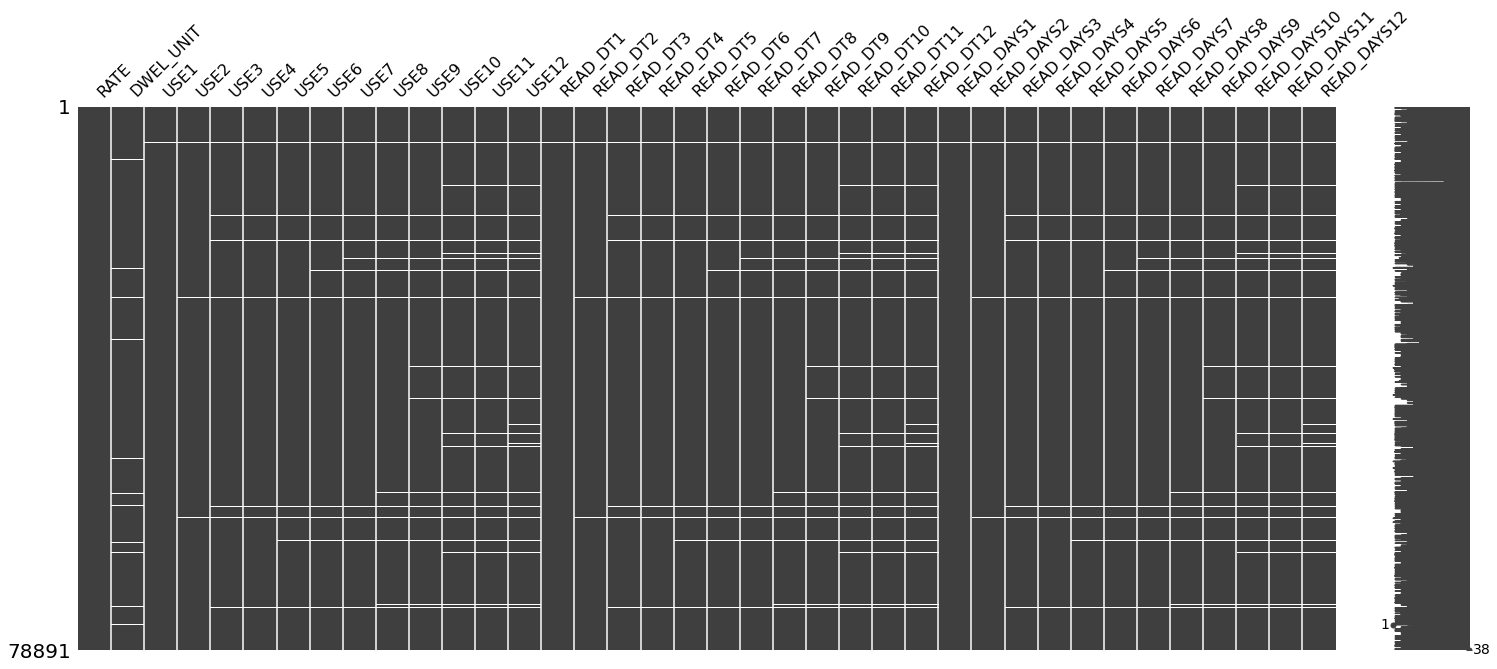

In [378]:
import missingno as msno
# Isolate missing and non missing values of inv_amount
missing_READDT12 = df1[df1['READ_DT12'].isna()]
READDT12 = df1[~df1['READ_DT12'].isna()]

# Sort banking by age and visualize
df1_sorted = df1.sort_values(by=['RATE'])
msno.matrix(df1)
plt.show()


## Find previous read date to fill some of READ_DT with NaT value in df1

In [379]:
#Create a new df that assign all READ_DT, all READ_Days and all USE values from df1 in 3 columns.
df1.reset_index(inplace= True)
long_df1 =pd.wide_to_long(df1, stubnames= ['USE','READ_DT', 'READ_DAYS'],
                i= ['LOC_ID','RATE'],
               j='period').reset_index()
long_df1.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS
0,1000000000,W-RSFD,1,1.0,22.0,2018-07-11,30.0
1,1000000000,W-RSFD,2,1.0,22.0,2018-06-11,32.0
2,1000000000,W-RSFD,3,1.0,15.0,2018-05-10,29.0
3,1000000000,W-RSFD,4,1.0,9.0,2018-04-11,29.0
4,1000000000,W-RSFD,5,1.0,10.0,2018-03-13,32.0


In [380]:
#Find the previous read date for each read date based on its associated read days.
long_df1['Previous_READ_DT'] = long_df1['READ_DT'] - pd.to_timedelta(long_df1['READ_DAYS'], unit='D')
long_df1.Previous_READ_DT = pd.to_datetime(long_df1.Previous_READ_DT)
long_df1.head(35)

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,W-RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11
1,1000000000,W-RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10
2,1000000000,W-RSFD,3,1.0,15.0,2018-05-10,29.0,2018-04-11
3,1000000000,W-RSFD,4,1.0,9.0,2018-04-11,29.0,2018-03-13
4,1000000000,W-RSFD,5,1.0,10.0,2018-03-13,32.0,2018-02-09
5,1000000000,W-RSFD,6,1.0,10.0,2018-02-09,31.0,2018-01-09
6,1000000000,W-RSFD,7,1.0,11.0,2018-01-09,32.0,2017-12-08
7,1000000000,W-RSFD,8,1.0,9.0,2017-12-08,31.0,2017-11-07
8,1000000000,W-RSFD,9,1.0,11.0,2017-11-07,29.0,2017-10-09
9,1000000000,W-RSFD,10,1.0,13.0,2017-10-09,31.0,2017-09-08


In [381]:
#Dropping the accouts that its Read date and previous read date are Nat.
missing_read_date1 = long_df1[long_df1['READ_DT'].isna()]
read_date1 = long_df1[~long_df1['READ_DT'].isna()]
read_date1.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,W-RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11
1,1000000000,W-RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10
2,1000000000,W-RSFD,3,1.0,15.0,2018-05-10,29.0,2018-04-11
3,1000000000,W-RSFD,4,1.0,9.0,2018-04-11,29.0,2018-03-13
4,1000000000,W-RSFD,5,1.0,10.0,2018-03-13,32.0,2018-02-09


In [382]:
missing_read_date1.shape

(30161, 8)

## Find previous read date to fill some of READ_DT with NaT value in df2

In [383]:
#Create a new df that assign all READ_DT, all READ_Days and all USE values from df2 in 3 columns.
df2.reset_index(inplace= True)
long_df2 =pd.wide_to_long(df2, stubnames= ['USE','READ_DT', 'READ_DAYS'],
                i= ['LOC_ID','RATE'],
               j='period').reset_index()
long_df2.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS
0,1000000000,W-RSFD,1,1.0,20.0,2019-07-10,30.0
1,1000000000,W-RSFD,2,1.0,13.0,2019-06-10,31.0
2,1000000000,W-RSFD,3,1.0,6.0,2019-05-10,29.0
3,1000000000,W-RSFD,4,1.0,5.0,2019-04-11,30.0
4,1000000000,W-RSFD,5,1.0,5.0,2019-03-12,29.0


In [384]:
#Find the previous read date for each read date based on its associated read days.
long_df2['Previous_READ_DT'] = long_df2['READ_DT'] - pd.to_timedelta(long_df2['READ_DAYS'], unit='D')
long_df2.Previous_READ_DT = pd.to_datetime(long_df2.Previous_READ_DT)
long_df2.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,W-RSFD,1,1.0,20.0,2019-07-10,30.0,2019-06-10
1,1000000000,W-RSFD,2,1.0,13.0,2019-06-10,31.0,2019-05-10
2,1000000000,W-RSFD,3,1.0,6.0,2019-05-10,29.0,2019-04-11
3,1000000000,W-RSFD,4,1.0,5.0,2019-04-11,30.0,2019-03-12
4,1000000000,W-RSFD,5,1.0,5.0,2019-03-12,29.0,2019-02-11


In [385]:
#Dropping the accouts that its Read date and previous read date are Nat.
missing_read_date2 = long_df2[long_df2['READ_DT'].isna()]
read_date2 = long_df2[~long_df2['READ_DT'].isna()]
read_date2.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,W-RSFD,1,1.0,20.0,2019-07-10,30.0,2019-06-10
1,1000000000,W-RSFD,2,1.0,13.0,2019-06-10,31.0,2019-05-10
2,1000000000,W-RSFD,3,1.0,6.0,2019-05-10,29.0,2019-04-11
3,1000000000,W-RSFD,4,1.0,5.0,2019-04-11,30.0,2019-03-12
4,1000000000,W-RSFD,5,1.0,5.0,2019-03-12,29.0,2019-02-11


In [386]:
missing_read_date2.shape

(3470, 8)

## Find previous read date to fill some of READ_DT with NaT value in df3

In [387]:
#Create a new df that assign all READ_DT, all READ_Days and all USE values from df3 in 3 columns.
df3.reset_index(inplace= True)
long_df3 =pd.wide_to_long(df3, stubnames= ['USE','READ_DT', 'READ_DAYS'],
                i= ['LOC_ID','RATE'],
               j='period').reset_index()
long_df3.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS
0,1000000000,W-RSFD,1,1.0,16.0,2020-07-10,31.0
1,1000000000,W-RSFD,2,1.0,13.0,2020-06-09,29.0
2,1000000000,W-RSFD,3,1.0,20.0,2020-05-11,31.0
3,1000000000,W-RSFD,4,1.0,10.0,2020-04-10,30.0
4,1000000000,W-RSFD,5,1.0,5.0,2020-03-11,29.0


In [388]:
#Find the previous read date for each read date based on its associated read days.
long_df3['Previous_READ_DT'] = long_df3['READ_DT'] - pd.to_timedelta(long_df3['READ_DAYS'], unit='D')
long_df3.Previous_READ_DT = pd.to_datetime(long_df3.Previous_READ_DT)
long_df3.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,W-RSFD,1,1.0,16.0,2020-07-10,31.0,2020-06-09
1,1000000000,W-RSFD,2,1.0,13.0,2020-06-09,29.0,2020-05-11
2,1000000000,W-RSFD,3,1.0,20.0,2020-05-11,31.0,2020-04-10
3,1000000000,W-RSFD,4,1.0,10.0,2020-04-10,30.0,2020-03-11
4,1000000000,W-RSFD,5,1.0,5.0,2020-03-11,29.0,2020-02-11


In [389]:
#Dropping the accouts that its Read date and previous read date are Nat.
missing_read_date3 = long_df3[long_df3['READ_DT'].isna()]
read_date3 = long_df3[~long_df3['READ_DT'].isna()]
read_date3.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,W-RSFD,1,1.0,16.0,2020-07-10,31.0,2020-06-09
1,1000000000,W-RSFD,2,1.0,13.0,2020-06-09,29.0,2020-05-11
2,1000000000,W-RSFD,3,1.0,20.0,2020-05-11,31.0,2020-04-10
3,1000000000,W-RSFD,4,1.0,10.0,2020-04-10,30.0,2020-03-11
4,1000000000,W-RSFD,5,1.0,5.0,2020-03-11,29.0,2020-02-11


In [390]:
missing_read_date3.shape

(3269, 8)

#### Now there are three DataFrames including read_date1, read_date2 and read_date3 with no missing values.